In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# ====================================================================
# 1) CARREGAR O CONJUNTO DE DADOS MNIST
# ====================================================================
print("Carregando o dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Normalizar valores de pixel para [0, 1]
X = X / 255.0

Carregando o dataset MNIST...


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Exibindo 16 imagens aleatórias do MNIST:


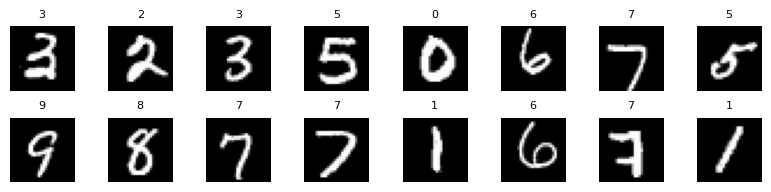

In [3]:
# ====================================================================
# 2) VISUALIZAR ALGUMAS IMAGENS PARA ENTENDER O FORMATO DOS DADOS
# ====================================================================
def mostrar_imagens(amostras, labels, num_por_linha=8):
    num_imagens = len(amostras)
    num_linhas = int(np.ceil(num_imagens / num_por_linha))
    plt.figure(figsize=(num_por_linha, num_linhas))
    for i, (img, lbl) in enumerate(zip(amostras, labels)):
        plt.subplot(num_linhas, num_por_linha, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(lbl, fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nExibindo 16 imagens aleatórias do MNIST:")
indices_aleatorios = np.random.choice(X.shape[0], 16, replace=False)
mostrar_imagens(X[indices_aleatorios], y[indices_aleatorios])


In [4]:
# ====================================================================
# 3) APLICAR PCA COM DIFERENTES NÚMEROS DE COMPONENTES PRINCIPAIS
# ====================================================================
componentes_testados = [10, 30, 50, 100]
pca_variancias = {}

for n in componentes_testados:
    print(f"\nAplicando PCA com n_components = {n}...")
    pca = PCA(n_components=n, svd_solver='randomized', random_state=42)
    pca.fit(X)
    variancia_explicada = np.sum(pca.explained_variance_ratio_) * 100
    pca_variancias[n] = variancia_explicada
    print(f"Variância explicada por {n} componentes: {variancia_explicada:.2f}%")



Aplicando PCA com n_components = 10...
Variância explicada por 10 componentes: 48.92%

Aplicando PCA com n_components = 30...
Variância explicada por 30 componentes: 73.16%

Aplicando PCA com n_components = 50...
Variância explicada por 50 componentes: 82.54%

Aplicando PCA com n_components = 100...
Variância explicada por 100 componentes: 91.46%


In [6]:
# ====================================================================
# 5) TREINAR CLASSIFICADOR E COMPARAR ACURÁCIA
# ====================================================================
# Dividir em conjunto de treino e teste (usar 20% para teste)
print("\nDividindo dados em treino e teste (80%/20%)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Função para treinar e avaliar um KNN
def avaliar_knn(X_tr, X_te, y_tr, y_te, k=3):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_tr, y_tr)
    y_pred = modelo.predict(X_te)
    return accuracy_score(y_te, y_pred)

# 5.1) Acurácia usando todas as 784 features
print("\nTreinando KNN com todas as 784 features...")
acc_full = avaliar_knn(X_train, X_test, y_train, y_test)
print(f"Acurácia KNN (784 features): {acc_full * 100:.2f}%")

# 5.2) Acurácia para cada redução pelo PCA
acuracias_pca = {}
for n in componentes_testados:
    print(f"\nProcessando PCA ({n} componentes) para classificação...")
    pca = PCA(n_components=n, svd_solver='randomized', random_state=42)
    # Ajustar PCA no conjunto de treino e transformar ambos treino e teste
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    acc_pca = avaliar_knn(X_train_pca, X_test_pca, y_train, y_test)
    acuracias_pca[n] = acc_pca
    print(f"Acurácia KNN ({n} componentes): {acc_pca * 100:.2f}%")


Dividindo dados em treino e teste (80%/20%)...

Treinando KNN com todas as 784 features...
Acurácia KNN (784 features): 97.14%

Processando PCA (10 componentes) para classificação...
Acurácia KNN (10 componentes): 92.89%

Processando PCA (30 componentes) para classificação...
Acurácia KNN (30 componentes): 97.61%

Processando PCA (50 componentes) para classificação...
Acurácia KNN (50 componentes): 97.81%

Processando PCA (100 componentes) para classificação...
Acurácia KNN (100 componentes): 97.51%



Visualizando projeção 2D das duas primeiras componentes principais...


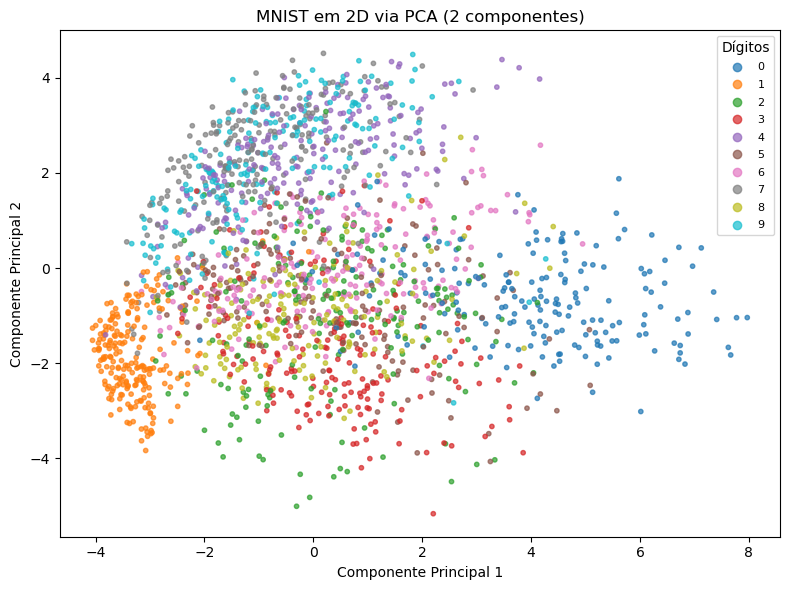

In [7]:
# ====================================================================
# 6) VISUALIZAR DADOS EM 2D COM AS DUAS PRIMEIRAS COMPONENTES PRINCIPAIS
# ====================================================================
print("\nVisualizando projeção 2D das duas primeiras componentes principais...")
pca_2d = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_pca_2d = pca_2d.fit_transform(X)

# Selecionar uma amostra para visualização (ex.: primeiros 2000 exemplos)
num_amostras = 2000
amostras_vis = X_pca_2d[:num_amostras]
labels_vis = y[:num_amostras]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    amostras_vis[:, 0], amostras_vis[:, 1],
    c=labels_vis, cmap='tab10', s=10, alpha=0.7
)
plt.legend(*scatter.legend_elements(), title="Dígitos", loc='upper right', fontsize=8)
plt.title("MNIST em 2D via PCA (2 componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

In [8]:
# ====================================================================
# RESULTADOS FINAIS
# ====================================================================
print("\n=== Resultado Final ===")
print(f"Acurácia KNN com todas as 784 features: {acc_full * 100:.2f}%")
for n, acc in acuracias_pca.items():
    print(f"Acurácia KNN com {n} componentes: {acc * 100:.2f}%")


=== Resultado Final ===
Acurácia KNN com todas as 784 features: 97.14%
Acurácia KNN com 10 componentes: 92.89%
Acurácia KNN com 30 componentes: 97.61%
Acurácia KNN com 50 componentes: 97.81%
Acurácia KNN com 100 componentes: 97.51%
